# Final Lab

## Introduction
In this lab we will practice all of the skills we've learned thus far in exploring, selecting, and filtering data in Pandas. We will be using a portion of the [Chicago Crime Dataset](https://www.kaggle.com/currie32/crimes-in-chicago/#Chicago_Crimes_2012_to_2017.csv) (`chicago_crime.csv`). Begin by importing the following libraries and populating a dataframe with the data in the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('chicago_crime.csv')

In [3]:
#print the first five rows of the dataframe
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,8692747,HV368620,2012-01-01,090XX S OAKLEY AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,19.0,72.0,26,1162617.0,1844687.0,2012,02/04/2016 06:33:39 AM,41.729470,-87.679883,"(41.729469531, -87.679882632)"
1,8911136,HV584173,2012-01-01,040XX W 26TH ST,1110,DECEPTIVE PRACTICE,BOGUS CHECK,TAVERN/LIQUOR STORE,False,False,...,22.0,30.0,11,1149939.0,1886420.0,2012,02/04/2016 06:33:39 AM,41.844246,-87.725245,"(41.844246118, -87.725244851)"
2,10698879,HZ443128,2012-01-01,007XX S ST LOUIS AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,24.0,27.0,20,NaN,NaN,2012,09/30/2016 03:52:35 PM,NaN,NaN,NaN
3,8812790,HV485714,2012-01-01,022XX S WABASH AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,2.0,33.0,11,1177098.0,1889498.0,2012,02/04/2016 06:33:39 AM,41.852121,-87.625483,"(41.852121445, -87.625483421)"
4,9239668,HW385707,2012-01-01,081XX S PAULINA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,18.0,71.0,06,1166429.0,1850640.0,2012,02/04/2016 06:33:39 AM,41.745725,-87.665749,"(41.74572518, -87.665749044)"


In [4]:
#print the last five rows of the dataframe
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
49995,10821727,JA122529,2017-01-18,116XX S LOWE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,34.0,53.0,26,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49996,10820573,JA121075,2017-01-18,070XX W WOLFRAM ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,36.0,18.0,14,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49997,10820615,JA121073,2017-01-18,013XX S MILLARD AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,24.0,29.0,15,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49998,10820562,JA121127,2017-01-18,067XX S GREEN ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,17.0,68.0,08B,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
49999,10820566,JA121151,2017-01-18,082XX S SOUTH SHORE DR,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,7.0,46.0,14,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN


In [5]:
#print the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
ID                      50000 non-null int64
Case Number             50000 non-null object
Date                    50000 non-null object
Block                   50000 non-null object
IUCR                    50000 non-null object
Primary Type            50000 non-null object
Description             50000 non-null object
Location Description    49948 non-null object
Arrest                  50000 non-null bool
Domestic                50000 non-null bool
Beat                    50000 non-null int64
District                50000 non-null float64
Ward                    50000 non-null float64
Community Area          50000 non-null float64
FBI Code                50000 non-null object
X Coordinate            48731 non-null float64
Y Coordinate            48731 non-null float64
Year                    50000 non-null int64
Updated On              50000 non-null object
Latitude           

Let's begin by familiarizing ourselves with each of the features. 
Print a statistical summary of all the numerical features in the dataset.

In [6]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,4.873100e+04,4.873100e+04,50000.000000,48731.000000,48731.000000
mean,9.595949e+06,1150.212340,11.254000,22.836100,37.415560,1.164413e+06,1.885650e+06,2013.894440,41.841822,-87.672188
std,8.150791e+05,690.085409,6.890105,13.770834,21.411586,1.725573e+04,3.234942e+04,1.450413,0.089017,0.062504
min,2.029800e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2012.000000,36.619446,-91.686566
25%,8.998506e+06,613.000000,6.000000,10.000000,23.000000,1.152464e+06,1.858858e+06,2013.000000,41.768137,-87.715726
50%,9.604606e+06,1024.000000,10.000000,23.000000,32.000000,1.165915e+06,1.891523e+06,2014.000000,41.858071,-87.666406
75%,1.022823e+07,1711.000000,16.000000,34.000000,56.000000,1.176363e+06,1.908561e+06,2015.000000,41.904861,-87.628082
max,1.082577e+07,2535.000000,31.000000,50.000000,77.000000,1.204911e+06,1.951503e+06,2017.000000,42.022536,-87.525274


The column "Primary Type" contains the name of the crime in each observation.
Print the total number (as a percentage) of each crime type in the dataframe.

In [7]:
df['Primary Type'].value_counts(normalize=True)

THEFT                                0.23100
BATTERY                              0.18226
CRIMINAL DAMAGE                      0.10612
NARCOTICS                            0.09280
ASSAULT                              0.06254
OTHER OFFENSE                        0.05938
BURGLARY                             0.05676
DECEPTIVE PRACTICE                   0.05116
MOTOR VEHICLE THEFT                  0.04220
ROBBERY                              0.03770
CRIMINAL TRESPASS                    0.02412
WEAPONS VIOLATION                    0.01146
PUBLIC PEACE VIOLATION               0.00924
OFFENSE INVOLVING CHILDREN           0.00780
PROSTITUTION                         0.00498
CRIM SEXUAL ASSAULT                  0.00446
INTERFERENCE WITH PUBLIC OFFICER     0.00432
SEX OFFENSE                          0.00320
HOMICIDE                             0.00196
ARSON                                0.00168
GAMBLING                             0.00164
LIQUOR LAW VIOLATION                 0.00120
STALKING  

The column "Arrest" is a boolean representing whether or not the crime led to an arrest.
Plot a histogram of the "Arrest" column.

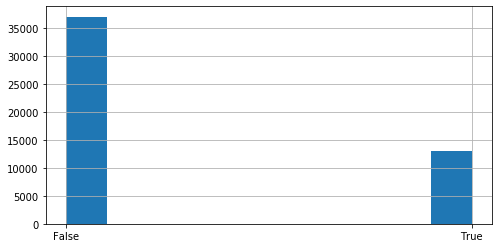

In [10]:
#matplotlib will raise an error if you plot a histogram of a boolean value, so convert to string first
df['Arrest'] = df['Arrest'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
df['Arrest'].hist();

The column "Domestic" is a boolean representing whether or not the crime was domestic-related. Plot a histograme of the "Domestic" column.

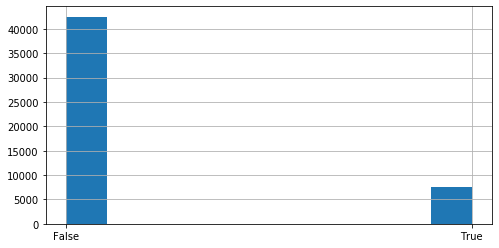

In [11]:
#matplotlib will raise an error if you plot a histogram of a boolean value, so convert to string first
df['Domestic'] = df['Domestic'].apply(lambda x: str(x))
plt.figure(figsize=(8,4))
df['Domestic'].hist();

Plot a hisrogram with the counts of crimes in each "Ward"

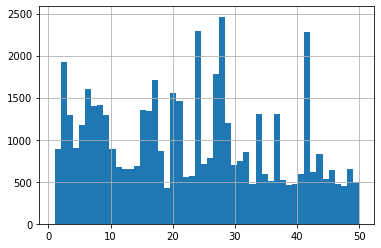

In [13]:
df['Ward'].hist(bins=len(df.Ward.unique()))